<a href="https://colab.research.google.com/github/mohorka/Intelligent_System/blob/main/Pandas%26DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### ~~1. Вывести: кол-во наблюдений в датасете~~
#### ~~2. Вывести названия столбцов~~
#### ~~3. Определить самую частую позицию (item) в заказе~~
#### ~~4. Построить гистрограмму частоты заказов по позициям (item )~~
#### ~~5. Измените тип переменной item_price c с помощью лямбды функции~~
#### ~~6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)~~
#### ~~7. Средняя сумма заказа? (минимум 2 способа)~~
#### ~~8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе~~
#### ~~9. Определить статистику заказов стейков, а также статистику заказов прожарки.~~
#### ~~10. Добавить новый столбец цен на каждую позицию в заказе в рублях.~~
#### ~~11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.~~
#### ~~12. Определить цену по каждой позиции в отдельности.~~


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Сначала нужно поменять цены, потом уже убрать добавки из названия


In [62]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t' )

In [63]:
#change data type of item_price
data['item_price'] = data.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)

In [64]:
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [65]:
#number of observation
data.shape

(4622, 5)

In [66]:
fixed = data.loc[data['item_price']==1.99].copy()
data.drop(index = 4509, inplace = True)
fixed.item_price = 2.15
fixed
data = pd.concat([data,fixed],ignore_index=True, axis=0)

In [67]:
#names of columns
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [68]:
#get min price of chips with adds
data.loc[data['item_name'].str.contains(' and ')]['item_price'].unique().min()

2.29

In [71]:
price_of_chips = 2.15
chips = data.loc[(data['item_name'].str.contains(' and ')) & (data['item_name'].str.contains('Chips'))]
menu = []
for index,row in chips.iterrows():
  adding = row.copy()
  items = row['item_name'].split(' and ')
  price = round(row.item_price - price_of_chips * row.quantity,2)
  adding['item_price'] = price
  adding['item_name'] = items[-1]
  menu.append(adding)
  #menu.update({items[-1]:price})
  data.loc[index, 'item_name'] = items[0]
  #row.item_name = row.item_name.replace(row.item_name,items[0])
  price = round(row.item_price - price,2)
  data.loc[index,'item_price'] = price

adds = pd.DataFrame(menu)
data = pd.concat([data,adds],ignore_index=True)
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips,NaN,2.15
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips,NaN,2.15
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
5389,1824,1,Guacamole,NaN,2.30
5390,1826,1,Guacamole,NaN,2.30
5391,1827,1,Guacamole,NaN,2.30
5392,1828,1,Guacamole,NaN,2.30


In [72]:
#number of orders
len(data['order_id'].value_counts().values)

1834

In [73]:
#the most popular item
data['item_name'].value_counts(normalize = True).index.tolist()[0]

'Chips'

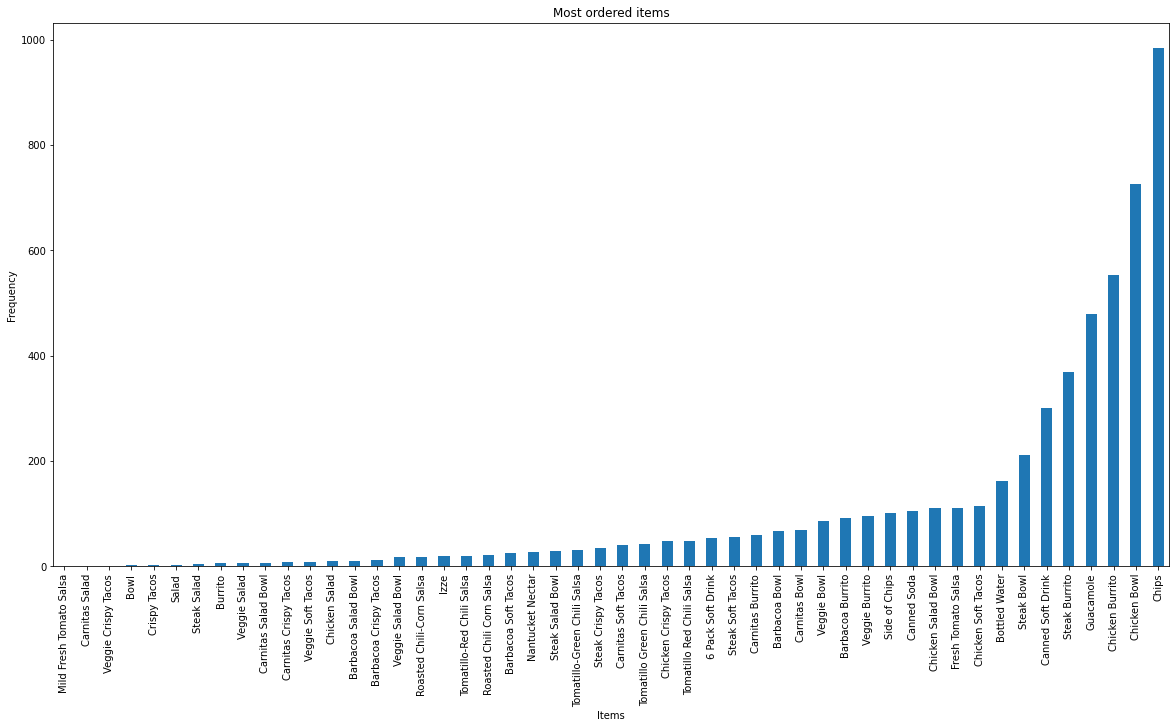

In [76]:
#histogram for the most ordered items
items = Counter(data.item_name)
df = pd.DataFrame.from_dict(items, orient='index')
df = df[0].sort_values(ascending=True)
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Most ordered items')
plt.show()

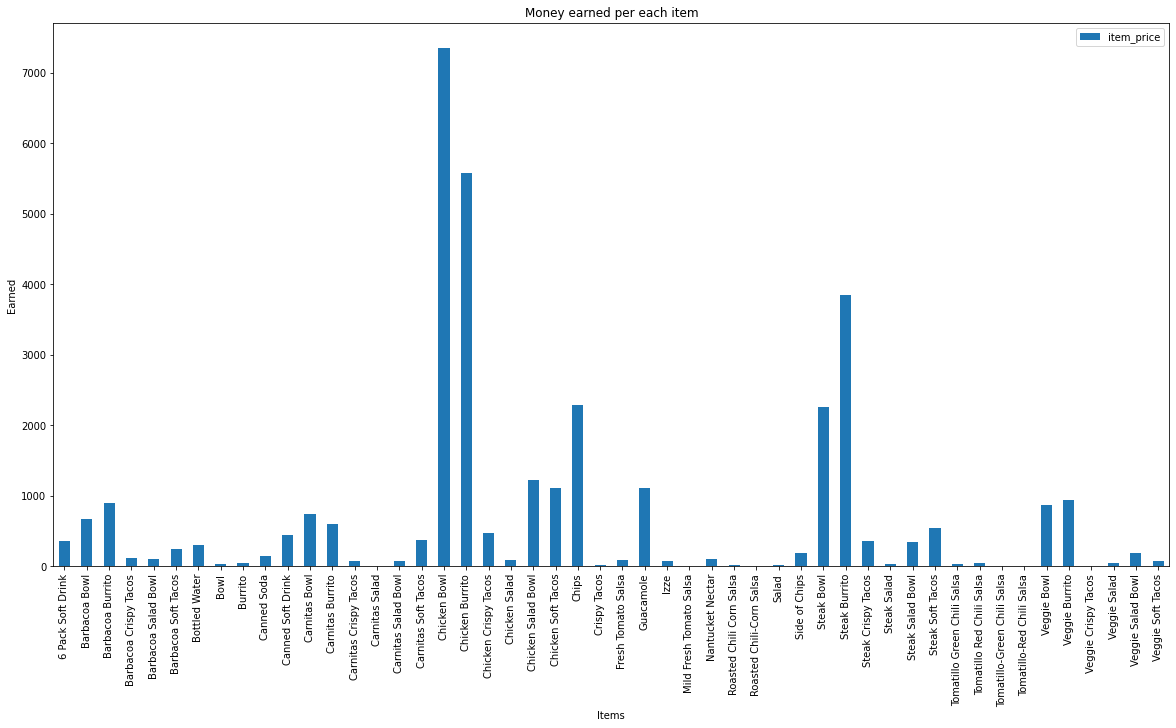

In [77]:
#Money earned per each item
df = data[['item_name','item_price']]
df = df.groupby('item_name').sum()
#df = df[0].sort_values(ascending=True)
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('Items')
plt.ylabel('Earned')
plt.title('Money earned per each item')
plt.show()

In [75]:
#full value of order
data.groupby('order_id').sum()

,quantity,item_price
order_id,,
1,6,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,3,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,3,13.20


In [80]:
# get mean
data.groupby('order_id')['item_price'].sum().mean()
#data['item_price'].sum() / data['order_id'].max()

18.811515812431956

In [81]:
data.groupby('order_id')['item_price'].agg(['sum', 'mean'])

,sum,mean
order_id,,
1,11.56,1.926667
2,16.98,16.980000
3,12.67,6.335000
4,21.00,10.500000
5,13.70,4.566667
...,...,...
1830,23.00,11.500000
1831,12.90,4.300000
1832,13.20,4.400000


In [ ]:
# mean, min, max, etc. about orders
data.groupby('order_id').agg(['mean','min','max','median'])

quantity                 ...     r_price                                  
             mean min max median  ...        mean        min        max      median
order_id                          ...                                              
1             1.0   1   1    1.0  ...   206.77950   171.0045   242.5545   206.77950
2             2.0   2   2    2.0  ...  1214.91900  1214.9190  1214.9190  1214.91900
3             1.0   1   1    1.0  ...   453.26925   120.9195   785.6190   453.26925
4             1.0   1   1    1.0  ...   751.27500   661.8375   840.7125   751.27500
5             1.0   1   1    1.0  ...   490.11750   318.3975   661.8375   490.11750
...           ...  ..  ..    ...  ...         ...        ...        ...         ...
1830          1.0   1   1    1.0  ...   822.82500   804.9375   840.7125   822.82500
1831          1.0   1   1    1.0  ...   307.66500   107.3250   661.8375   153.83250
1832          1.0   1   1    1.0  ...   472.23000   318.3975   626.0625   472.23000
1833          1.0   1   1    1.0  ...   840.71250   840.7125   840.7125   840.71250
1834          1.0   1   1    1.0  ...   685.68750   626.0625   804.9375   626.06250

[1834 rows x 12 columns]

In [96]:
#get individual prices
individual_prices = []
for _,row in data.iterrows():
  if row.quantity != 1:
    individual_prices.append('The price of '+row.item_name+'is '+str(round(row.item_price/row.quantity,2)))
  else:
    individual_prices.append('The price of '+row.item_name+'is '+str(row.item_price))

individual_prices = np.array(individual_prices)
np.unique(individual_prices)

array(['The price of 6 Pack Soft Drinkis 6.49',
       'The price of Barbacoa Bowlis 11.48',
       'The price of Barbacoa Bowlis 11.49',
       'The price of Barbacoa Bowlis 11.75',
       'The price of Barbacoa Bowlis 8.69',
       'The price of Barbacoa Bowlis 8.99',
       'The price of Barbacoa Bowlis 9.25',
       'The price of Barbacoa Burritois 11.08',
       'The price of Barbacoa Burritois 11.48',
       'The price of Barbacoa Burritois 11.75',
       'The price of Barbacoa Burritois 8.69',
       'The price of Barbacoa Burritois 8.99',
       'The price of Barbacoa Burritois 9.25',
       'The price of Barbacoa Crispy Tacosis 11.48',
       'The price of Barbacoa Crispy Tacosis 11.75',
       'The price of Barbacoa Crispy Tacosis 8.99',
       'The price of Barbacoa Crispy Tacosis 9.25',
       'The price of Barbacoa Salad Bowlis 11.89',
       'The price of Barbacoa Salad Bowlis 9.39',
       'The price of Barbacoa Soft Tacosis 11.48',
       'The price of Barbacoa Soft Tac

In [88]:
#add price in rub
exchange = 71.55
data['r_price'] = [x*71.55 for x in data['item_price']]
data.head()

,order_id,quantity,item_name,choice_description,item_price,r_price
0,1,1,Chips,NaN,2.15,153.8325
1,1,1,Izze,[Clementine],3.39,242.5545
2,1,1,Nantucket Nectar,[Apple],3.39,242.5545
3,1,1,Chips,NaN,2.15,153.8325
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1214.9190


In [89]:
#statistics for steaks
steaks = data.loc[data['item_name'].str.contains('Steak')]
steaks.groupby('item_name')['quantity','item_price','r_price'].describe()

quantity                      ...   r_price                     
                      count      mean       std  ...       50%       75%        max
item_name                                        ...                               
Steak Bowl            211.0  1.047393  0.234278  ...  661.8375  840.7125  1865.3085
Steak Burrito         368.0  1.048913  0.239889  ...  661.8375  840.7125  1985.5125
Steak Crispy Tacos     35.0  1.028571  0.169031  ...  661.8375  840.7125  1286.4690
Steak Salad             4.0  1.000000  0.000000  ...  643.2345  643.2345   643.2345
Steak Salad Bowl       29.0  1.068966  0.257881  ...  850.7295  850.7295  1701.4590
Steak Soft Tacos       55.0  1.018182  0.134840  ...  661.8375  661.8375  1323.6750

[6 rows x 24 columns]

In [92]:
steaks_mild = steaks[steaks['choice_description'].str.contains('Mild')]
steaks_medium = steaks[steaks['choice_description'].str.contains('Medium')]
steaks_hot = steaks[steaks['choice_description'].str.contains('Hot')]

In [95]:
#statistics for mild steaks by choice description
steaks_mild.groupby('choice_description')['item_price'].describe()


,count,mean,std,min,25%,50%,75%,max
choice_description,,,,,,,,
"[Fresh Tomato (Mild), [Black Beans, Guacamole, Rice, Sour Cream, Cheese]]",1.0,11.08,NaN,11.08,11.08,11.08,11.08,11.08
"[Fresh Tomato (Mild), [Guacamole, Lettuce, Pinto Beans, Rice, Sour Cream, Cheese]]",2.0,11.08,0.0,11.08,11.08,11.08,11.08,11.08
"[Fresh Tomato (Mild), [Lettuce, Black Beans, Rice, Cheese]]",1.0,8.69,NaN,8.69,8.69,8.69,8.69,8.69
"[Fresh Tomato (Mild), [Lettuce, Black Beans, Rice]]",1.0,8.69,NaN,8.69,8.69,8.69,8.69,8.69
"[Fresh Tomato (Mild), [Lettuce, Cheese]]",1.0,8.69,NaN,8.69,8.69,8.69,8.69,8.69
...,...,...,...,...,...,...,...,...
"[[Roasted Chili Corn Salsa (Medium), Fresh Tomato Salsa (Mild)], [Rice, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",1.0,11.48,NaN,11.48,11.48,11.48,11.48,11.48
"[[Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Fajita Veggies, Cheese, Sour Cream]]",2.0,8.99,0.0,8.99,8.99,8.99,8.99,8.99
"[[Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Salsa (Mild)], [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",1.0,8.99,NaN,8.99,8.99,8.99,8.99,8.99


In [ ]:
steaks_medium.groupby('choice_description')['item_price'].describe()

,count,mean,std,min,25%,50%,75%,max
choice_description,,,,,,,,
"[Roasted Chili Corn (Medium), [Sour Cream, Cheese]]",1.0,8.69,NaN,8.69,8.69,8.69,8.69,8.69
"[Roasted Chili Corn Salsa (Medium), Lettuce]",2.0,8.99,0.0,8.99,8.99,8.99,8.99,8.99
"[Roasted Chili Corn Salsa (Medium), Rice]",1.0,8.99,NaN,8.99,8.99,8.99,8.99,8.99
"[Roasted Chili Corn Salsa (Medium), [Black Beans, Cheese, Sour Cream, Lettuce]]",1.0,8.99,NaN,8.99,8.99,8.99,8.99,8.99
"[Roasted Chili Corn Salsa (Medium), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]",1.0,8.99,NaN,8.99,8.99,8.99,8.99,8.99
...,...,...,...,...,...,...,...,...
"[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Black Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",1.0,22.96,NaN,22.96,22.96,22.96,22.96,22.96
"[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",1.0,8.99,NaN,8.99,8.99,8.99,8.99,8.99
"[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",1.0,8.99,NaN,8.99,8.99,8.99,8.99,8.99


In [ ]:
steaks_hot.groupby('choice_description')['item_price'].describe()

,count,mean,std,min,25%,50%,75%,max
choice_description,,,,,,,,
"[Rice, Tomatillo-Red Chili Salsa (Hot)]",2.0,8.990000,0.000000,8.99,8.99,8.99,8.990,8.99
"[Tomatillo Red Chili (Hot), [Lettuce, Black Beans, Rice, Sour Cream, Cheese]]",1.0,8.690000,NaN,8.69,8.69,8.69,8.690,8.69
"[Tomatillo Red Chili (Hot), [Lettuce, Rice, Sour Cream, Cheese]]",1.0,8.690000,NaN,8.69,8.69,8.69,8.690,8.69
"[Tomatillo-Red Chili Salsa (Hot), Lettuce]",1.0,8.990000,NaN,8.99,8.99,8.99,8.990,8.99
"[Tomatillo-Red Chili Salsa (Hot), Rice]",1.0,8.990000,NaN,8.99,8.99,8.99,8.990,8.99
"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Lettuce]]",1.0,8.990000,NaN,8.99,8.99,8.99,8.990,8.99
"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",1.0,11.480000,NaN,11.48,11.48,11.48,11.480,11.48
"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]",3.0,8.990000,0.000000,8.99,8.99,8.99,8.990,8.99
"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",2.0,8.990000,0.000000,8.99,8.99,8.99,8.990,8.99


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.